<a href="https://colab.research.google.com/github/AllanHigorLP/Atividade_avaliativa-2.1-RNA/blob/main/Atividade_2_1_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detalhamento da Atividade

In [ ]:
x = 12%4
print(x)

0


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics
import unicodedata
import io

In [ ]:
!git clone https://github.com/AllanHigorLP/Atividade_avaliativa-2.1-RNA/

fatal: destination path 'Atividade_avaliativa-2.1-RNA' already exists and is not an empty directory.


In [ ]:
df = np.fromfile('/content/Atividade_avaliativa-2.1-RNA/data/dataAll.txt')
print(df)

[-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ]


In [ ]:
df.shape


(3000,)

In [ ]:
df = df.reshape(1000, 3)
print(df)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


# Parte I – Resolvendo um Problema Linearmente Separável

In [ ]:
# n (taxa de aprendizado)
theta = 0.0
n = 0.1
bias = -1.0

In [198]:
max = 0.5
min = -0.5
weight = np.random.uniform(min, max, size=3)
weight = np.round(weight,4)
print(weight)

[ 0.2882 -0.4631  0.3151]


In [199]:
epoca = 0
erros = 1
ajustes_total = 0
ajustes_epoca = 0

def soma_ponderada():
    sum_pond = (weight[0]*(bias)) + (weight[1]*example[0]) + (weight[2]*example[1])
    return sum_pond 

def funcao_ativacao():
    if u >= theta:
        return 1.0
    else:
        return 0.0

def novo_peso(w, fu_ac):
    e = example[2] - fu_ac
    novo_p = w + (n*e*np.array([bias, example[0], example[1]]))
    novo_p = np.round(novo_p,4)
    return novo_p
    
while (erros != 0):
    epoca = epoca + 1
    ajustes_epoca = 0
    erros = 0
    
    for example in df:
        funct_act = 0.0
        u = 0.0
        u = soma_ponderada()
        funct_act = funcao_ativacao()
        
        if funct_act != example[2]:
            ajustes_epoca = ajustes_epoca + 1
            ajustes_total = ajustes_total + 1
            erros = 1
            weight = novo_peso(weight, funct_act)
            print("Novo vetor de pesos ajustado", weight, "\n")
            
    print("Qtd de ajustes do vetor de pesos na época", epoca, ":", ajustes_epoca, "\n")
    
print("\nVetor de pesos final (ajustado): ", weight)
print("Número total de ajustes do vetor de pesos:", ajustes_total)
print("Número total de epocas:", epoca)

Novo vetor de pesos ajustado [  0.3882  35.9157 -24.0991] 

Novo vetor de pesos ajustado [   0.4882  -17.7434 -100.5949] 

Novo vetor de pesos ajustado [  0.3882  55.0526 -64.7653] 

Novo vetor de pesos ajustado [  0.2882 137.6513  15.0905] 

Novo vetor de pesos ajustado [  0.3882 143.4971 -63.2041] 

Novo vetor de pesos ajustado [   0.4882  103.4882 -141.0968] 

Novo vetor de pesos ajustado [  0.5882 157.158  -92.0045] 

Novo vetor de pesos ajustado [   0.4882  104.1979 -148.874 ] 

Novo vetor de pesos ajustado [  0.5882 163.7574 -98.7517] 

Novo vetor de pesos ajustado [   0.4882  118.2328 -164.3876] 

Novo vetor de pesos ajustado [  0.5882 208.9487 -89.6743] 

Novo vetor de pesos ajustado [   0.4882  151.1677 -149.9824] 

Novo vetor de pesos ajustado [   0.3882  102.9011 -198.4521] 

Novo vetor de pesos ajustado [   0.2882  173.3485 -156.3358] 

Novo vetor de pesos ajustado [   0.1882  126.5065 -207.7457] 

Novo vetor de pesos ajustado [   0.0882  196.3701 -143.5268] 

Novo vetor de

In [ ]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weight[0]/weight[2]), 4)) + 
      " -(" + 
      str(np.round((weight[1]/weight[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.0033 -(-1.0027)*x1


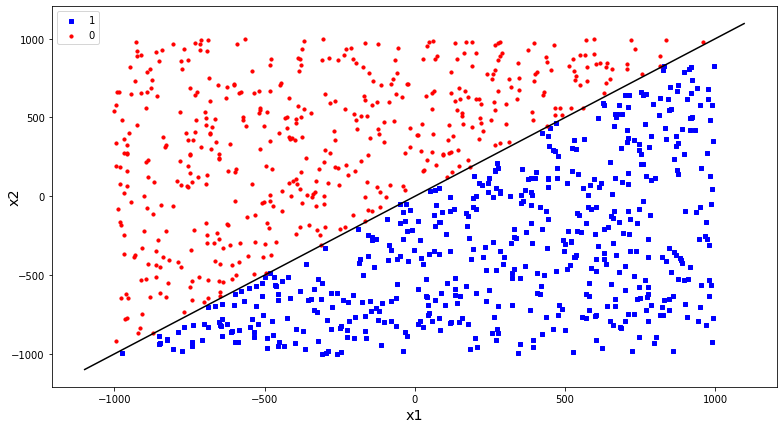

In [ ]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in df:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-10, size='x-large')

slope = -(weight[0]/weight[2]) / (weight[0]/weight[1]) 

ymin, ymax = plt.ylim()
xx = np.linspace(ymin, ymax)

plt.plot(xx, xx, 'k-')


#plt.axline(0, (weight[0]/weight[2]), slope, color="black", lw=2)

plt.show()